<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/abonnent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abonnenter

## Loading packages

In [29]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Setting theme for visuals
#sns.set_theme(rc = {'figure.figsize': (8, 4)})

In [ ]:
# Unzipping data
!unzip data.zip

In [ ]:
# Reading data and saving to dataframe
df = pd.read_csv("dataset_ice.csv", sep="|")

In [ ]:
df.iloc[21:24]

,DATA_SOURCE,PRICEPLAN_ID,SYSTEM_NAME,EVENT_TYPE,EVENT_SUBTYPE,ACTIVATION_TYPE,DATE,H_MAIN_ID,H_DATA_ID,INCLUDED_MB,LIFETIME_DAYS,FEE,DISCOUNT,OPERATOR,CUSTOMER_SEGMENT,PRODUCT_FAMILY,PRODUCT_GENERATION,PRODUCT_TYPE,PRODUCT_NAME,MARKET_SEGMENT,MARKET_SEGMENT_GROUP,SALES_CHANNEL_NAME,SALES_CHANNEL_CHAIN_NAME,SALES_CHANNEL_DEALER_NAME,PRICEPLAN_FULL_MONTH,RGU_FULL_MONTH,NATIONAL_MB,INTROAM_INSIDE_EU_EEC_MB,INTROAM_OUTSIDE_EU_EEC_MB
21,Activation,INB-11876696-0,INB,Addition,NaN,Addition,2018-01-12 00.00.00.000000,c2d5a99c1dfeb6ad39c665151072e516,NaN,6144,NaN,349.0,0.0,833.0,Business,Smartphone,PPG2,Bedrift 6 GB,Bedrift 6 GB,SOHO,SOHO,Outbound,Instacall,Instacall AS,NaN,NaN,NaN,NaN,NaN
22,Activation,INB-11909257-0,INB,Addition,NaN,Addition,2018-01-15 00.00.00.000000,7b0af7bf3dd978f5ba137aba9a8899ba,NaN,1024,NaN,129.0,0.0,815.0,Business,Smartphone,PPG2,Bedrift 1 GB,Bedrift 1 GB,SOHO,SOHO,Outbound,Instacall,Instacall AS,NaN,NaN,NaN,NaN,NaN
23,Activation,INB-11909272-0,INB,Addition,NaN,Addition,2018-01-15 00.00.00.000000,c4a78eb381580fa9d1f4e17b1ec5af77,NaN,1024,NaN,129.0,0.0,815.0,Business,Smartphone,PPG2,Bedrift 1 GB,Bedrift 1 GB,SOHO,SOHO,Outbound,Instacall,Instacall AS,NaN,NaN,NaN,NaN,NaN


## Data Manipulation

In [4]:
# Applying regex to convert string to valid date format
df['DATE'].replace(to_replace=r'( 00\.00\.)', value=' 00:00:', regex=True, inplace=True)

In [5]:
# Converting string to datetime column
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d %H:%M:%S')

In [6]:
# Slicing dataset to use only selected columns
col_slice = ['DATE', 'DATA_SOURCE', 'PRICEPLAN_ID', 'INCLUDED_MB', 'LIFETIME_DAYS', 'FEE', 'DISCOUNT', 'OPERATOR',
             'PRODUCT_GENERATION', 'PRODUCT_TYPE', 'PRODUCT_NAME', 'MARKET_SEGMENT', 'SALES_CHANNEL_NAME',
             'SALES_CHANNEL_CHAIN_NAME', 'SALES_CHANNEL_DEALER_NAME', 'PRICEPLAN_FULL_MONTH', 'RGU_FULL_MONTH']
df = df[col_slice]

In [7]:
# Assigning categories from datetime
df = df.assign(Månd_num = df['DATE'].dt.month,
               Månd = df['DATE'].dt.month_name().str[:3],
               Dag_num = df['DATE'].dt.dayofweek,
               Dag = df['DATE'].dt.day_name().str[:3])

In [8]:
# Checking the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495818 entries, 0 to 495817
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DATE                       495818 non-null  datetime64[ns]
 1   DATA_SOURCE                495818 non-null  object        
 2   PRICEPLAN_ID               495818 non-null  object        
 3   INCLUDED_MB                495818 non-null  int64         
 4   LIFETIME_DAYS              477033 non-null  float64       
 5   FEE                        495712 non-null  float64       
 6   DISCOUNT                   495712 non-null  float64       
 7   OPERATOR                   28073 non-null   float64       
 8   PRODUCT_GENERATION         495818 non-null  object        
 9   PRODUCT_TYPE               495818 non-null  object        
 10  PRODUCT_NAME               495818 non-null  object        
 11  MARKET_SEGMENT             492956 non-null  object  

In [9]:
# Creating a list of the columns
col_list = list(df.columns)

In [10]:
# Analyzing the value proportion for each column
@interact(Col=col_list)
def proportion_count(Col):
  #return df.loc[:, Col].value_counts()
  return df.value_counts(subset=Col, normalize=True, dropna=False).reset_index(name="Proportion")

interactive(children=(Dropdown(description='Col', options=('DATE', 'DATA_SOURCE', 'PRICEPLAN_ID', 'INCLUDED_MB…

## Q1

In [99]:
# Aggregating subscribers data by market segment
df1_a = df[df['DATA_SOURCE']=='Stock'].groupby(by=['Månd_num', 'Månd', 'MARKET_SEGMENT']).agg(Abonnenter = ('PRICEPLAN_ID', 'count')).reset_index()
df1_a.tail()

,Månd_num,Månd,MARKET_SEGMENT,Abonnenter
55,12,Dec,ENTERPRISE,2695
56,12,Dec,MEDIUM BUS,5585
57,12,Dec,PUBLIC,332
58,12,Dec,SMALL BUS,5106
59,12,Dec,SOHO,24334


In [100]:
# Plotting the subscribers by market segment
fig1_a = px.bar(data_frame=df1_a, x='Månd', y='Abonnenter', color='MARKET_SEGMENT', height=450, width=800)
fig1_a.update_layout(title_text='Abonnenter i 2018 - Markedssegment', title_x=0.5)
fig1_a.show()

In [101]:
# 1. Hvordan har abonnementsutviklingen (stock) vært gjennom 2018?
df1_b = df1_a.groupby(by=['Månd_num', 'Månd']).agg(Abonnenter = ('Abonnenter', 'sum')).reset_index()
df1_b

,Månd_num,Månd,Abonnenter
0,1,Jan,35821
1,2,Feb,36677
2,3,Mar,37293
3,4,Apr,38254
4,5,May,38575
5,6,Jun,38937
6,7,Jul,39391
7,8,Aug,39466
8,9,Sep,39066
9,10,Oct,38740


In [109]:
# Plotting subscribers data trend
fig1_b = px.bar(data_frame=df1_b, x='Månd', y='Abonnenter', height=450, width=800, text_auto='.3s')
fig1_b.update_layout(title_text='Abonnenter i 2018', title_x=0.5, yaxis_range=[35000, 40000])
fig1_b.show()

## Q2

In [ ]:
# Aggregating the activations by sales channel
df2_a = df[df['DATA_SOURCE']=='Activation'].groupby(by=['Månd_num', 'Månd', 'SALES_CHANNEL_NAME']).agg(Aktiveringer = ('PRICEPLAN_ID', 'count')).reset_index()
df2_a.tail()

,Månd_num,Månd,SALES_CHANNEL_NAME,Aktiveringer
80,12,Dec,Ice Sales Partner,263
81,12,Dec,Inbound,188
82,12,Dec,Outbound,438
83,12,Dec,Partner Sales,236
84,12,Dec,Retail,34


In [ ]:
# Plotting the activations by sales channel
fig2_a = px.bar(data_frame=df2_a, x='Månd', y='Aktiveringer', color='SALES_CHANNEL_NAME', height=450, width=800)
fig2_a.update_layout(title_text='Aktiveringer i 2018 - Salgskanal', title_x=0.5)
fig2_a.show()

In [ ]:
# 2. Hvordan har salgsutviklingen (aktiveringer) vært gjennom 2018?
df2_b = df2_a.groupby(by=['Månd_num', 'Månd']).agg(Aktiveringer = ('Aktiveringer', 'sum')).reset_index()
df2_b

,Månd_num,Månd,Aktiveringer
0,1,Jan,1564
1,2,Feb,1705
2,3,Mar,1680
3,4,Apr,1851
4,5,May,1656
5,6,Jun,1824
6,7,Jul,1196
7,8,Aug,1241
8,9,Sep,1072
9,10,Oct,1309


In [ ]:
# Plotting the activation over the year
fig2_b = px.bar(data_frame=df2_b, x='Månd', y='Aktiveringer', height=450, width=800, text_auto=True)
fig2_b.update_layout(title_text='Aktiveringer i 2018', title_x=0.5)
fig2_b.show()

## Q3

In [ ]:
# Aggregating the cancellations by market segment
df3_a = df[df['DATA_SOURCE']=='Cancellation'].groupby(by=['Månd_num', 'Månd', 'MARKET_SEGMENT']).agg(Kanselleringer = ('PRICEPLAN_ID', 'count')).reset_index()
df3_a.tail()

,Månd_num,Månd,MARKET_SEGMENT,Kanselleringer
55,12,Dec,ENTERPRISE,176
56,12,Dec,MEDIUM BUS,352
57,12,Dec,PUBLIC,1
58,12,Dec,SMALL BUS,208
59,12,Dec,SOHO,651


In [ ]:
# Plotting the cancellations by market segment
fig3_a = px.bar(data_frame=df3_a, x='Månd', y='Kanselleringer', color='MARKET_SEGMENT', height=450, width=800)
fig3_a.update_layout(title_text='Kanselleringer i 2018 - Markedssegment', title_x=0.5)
fig3_a.show()

In [ ]:
# 3. Hvordan har churnutviklingen vært gjennom 2018?
df3_b = df3_a.groupby(by=['Månd_num', 'Månd']).agg(Kanselleringer = ('Kanselleringer', 'sum')).reset_index()
df3_b

,Månd_num,Månd,Kanselleringer
0,1,Jan,1358
1,2,Feb,927
2,3,Mar,1140
3,4,Apr,965
4,5,May,1389
5,6,Jun,1473
6,7,Jul,753
7,8,Aug,1198
8,9,Sep,1537
9,10,Oct,1688


In [ ]:
# Plotting the cancellations over the year
fig3_b = px.bar(data_frame=df3_b, x='Månd', y='Kanselleringer', height=450, width=800, text_auto=True)
fig3_b.update_layout(title_text='Kanselleringer i 2018', title_x=0.5)
fig3_b.show()

In [ ]:
type(df4_a['OPERATOR'][0])

numpy.float64

## Q4

In [ ]:
# 4. Til hvilken konkurrent mister ice flest abonnenter?
df4_a = df[df['DATA_SOURCE']=='Cancellation'].groupby(by=['OPERATOR']).agg(Kanselleringer = ('PRICEPLAN_ID', 'count')).reset_index()
df4_a = df4_a.sort_values(by='Kanselleringer', ascending=False).reset_index(drop=True)
df4_a = df4_a.assign(Konkurrent = np.where(df4_a['Kanselleringer']<100, 'Andre...', df4_a['OPERATOR'].astype(str).str[:3]))
df4_a

,OPERATOR,Kanselleringer,Konkurrent
0,832.0,5083,832
1,815.0,3158,815
2,885.0,1364,885
3,833.0,912,833
4,819.0,799,819
5,705.0,498,705
6,830.0,346,830
7,898.0,235,898
8,879.0,127,879
9,702.0,53,Andre...


In [ ]:
# Plotting the cancellations by competitor
fig4_a = px.treemap(data_frame=df4_a, path=['Konkurrent'], values='Kanselleringer', height=450, width=800)
fig4_a.update_layout(title_text='Flest Kanselleringer i 2018 - Konkurrent', title_x=0.5)
fig4_a.update_traces(textposition="top center")
fig4_a.show()

## Q5

In [ ]:
# 5. Fra hvilken konkurrent vinner ice flest abonnenter?
df5_a = df[df['DATA_SOURCE']=='Activation'].value_counts(subset='OPERATOR').reset_index(name='Aktiveringer')
df5_a = df5_a.assign(Konkurrent = np.where(df5_a['Aktiveringer']<100, 'Andre..', df5_a['OPERATOR'].astype(str).str[:3]))
df5_a

,OPERATOR,Aktiveringer,Konkurrent
0,832.0,6143,832
1,815.0,4686,815
2,885.0,1228,885
3,833.0,864,833
4,705.0,589,705
5,898.0,549,898
6,879.0,518,879
7,817.0,280,817
8,736.0,141,736
9,819.0,140,819


In [ ]:
# Plotting the activations by competitor
fig5_a = px.treemap(data_frame=df5_a, path=['Konkurrent'], values='Aktiveringer', height=450, width=800)
fig5_a.update_layout(title_text='Flest Aktiveringer i 2018 - Konkurrent', title_x=0.5)
fig5_a.update_traces(textposition="top center")
fig5_a.show()

## Q6

In [88]:
#6. Hvor stor markedsandel hadde ice ved utgangen av 2018?
Operator = ['Telenor', 'Telia', 'Ice', 'Øvrige', 'Lycamobile', 'Komplett mobil', 'Fjordkraft']
Markedsandel = [48.5, 36.2, 8.7, 3.2, 1.2, 1.1, 1.1]
fig6_a = go.Figure(data=[go.Pie(labels=Operator, values=Markedsandel, hole=.3)])
fig6_a.update_layout(title_text='Markedsandel av mobiltelefoniabonnement i 2018', title_x=0.5)
fig6_a.update_traces(textposition="inside")
fig6_a.show()

## Q7-a

In [11]:
# KRONER - #7a Hva mener du er fire viktige innsikter i datasettet uavhengig av de konkrete spørsmålene over?
df7_a = df.groupby(by=['Månd_num', 'Månd']).agg(KRONER = ('FEE', 'sum')).reset_index()
df7_a

,Månd_num,Månd,KRONER
0,1,Jan,10795098.0
1,2,Feb,10811253.0
2,3,Mar,10994399.0
3,4,Apr,11263524.0
4,5,May,11373582.0
5,6,Jun,11502826.0
6,7,Jul,11232861.0
7,8,Aug,11393450.0
8,9,Sep,11300113.0
9,10,Oct,11270937.0


In [12]:
# Plotting the Income over the year
fig7_a = px.bar(data_frame=df7_a, x='Månd', y='KRONER', height=450, width=800, text_auto='.3s')
fig7_a.update_layout(title_text='Inntekt i 2018', title_x=0.5, yaxis_range=[10000000, 12000000])
fig7_a.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
fig7_a.show()

## Q7-b

In [23]:
# DISCOUNT - #7b Hva mener du er fire viktige innsikter i datasettet uavhengig av de konkrete spørsmålene over?
df7_b = df.groupby(by=['Månd_num', 'Månd']).agg(SALG = ('FEE', 'sum'), RABATT = ('DISCOUNT', 'sum')).reset_index()
df7_b = df7_b.assign(RABATT = df7_b['RABATT']*-1)
df7_b = pd.melt(df7_b, id_vars=['Månd_num', 'Månd'], value_vars=['SALG', 'RABATT'], var_name='FINANSKATEGORI', value_name='KRONER')
df7_b

,Månd_num,Månd,FINANSKATEGORI,KRONER
0,1,Jan,SALG,1.079510e+07
1,2,Feb,SALG,1.081125e+07
2,3,Mar,SALG,1.099440e+07
3,4,Apr,SALG,1.126352e+07
4,5,May,SALG,1.137358e+07
5,6,Jun,SALG,1.150283e+07
6,7,Jul,SALG,1.123286e+07
7,8,Aug,SALG,1.139345e+07
8,9,Sep,SALG,1.130011e+07
9,10,Oct,SALG,1.127094e+07


In [28]:
# Plotting the Count Q7b over the year
fig7_b = px.bar(data_frame=df7_b, x='Månd', y='KRONER', color='FINANSKATEGORI' , height=450, width=800, text_auto='.3s')
fig7_b.update_layout(title_text='Salg vs. Rabatt i 2018', title_x=0.5, yaxis_range=[8000000, 13500000])
fig7_b.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
fig7_b.show()

## Q7-c

In [125]:
# Aggregating sales by sales channel
df7_c = df.groupby(by=['SALES_CHANNEL_NAME']).agg(KRONER = ('FEE', 'sum')).reset_index()
df7_c = df7_c.sort_values(by='KRONER', ascending=False).reset_index(drop=True)
df7_c

,SALES_CHANNEL_NAME,KRONER
0,Outbound,3404388.0
1,Partner Sales,2280848.0
2,Inbound,949983.0
3,Ice Sales Partner,917311.0
4,Retail,241255.0
5,Direct Sales,60076.0
6,Mobile Data Sales,26151.0
7,Unknown,19861.0
8,Internal,19537.0
9,Digital Sales,13910.0


In [126]:
# Plotting the sales by channel name
fig7_c = px.bar(data_frame=df7_c, x='SALES_CHANNEL_NAME', y='KRONER', color='SALES_CHANNEL_NAME', text_auto='.3s', height=450, width=800)
fig7_c.update_layout(title_text='Salg i 2018 - Salgskanal', title_x=0.5, showlegend=False)
fig7_c.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
fig7_c.show()

## Q7-d

In [80]:
# MEGAS - #7d Hva mener du er fire viktige innsikter i datasettet uavhengig av de konkrete spørsmålene over?
df7_d = df.value_counts(subset='INCLUDED_MB', normalize=True).reset_index(name='PROSENT')
df7_d = df7_d.assign(INCLUDED_MB = df7_d['INCLUDED_MB'].astype(str)+'MB', PROSENT = df7_d['PROSENT']*100)
df7_d = df7_d.assign(DATAPAKKER = np.where(df7_d['PROSENT']<1, 'ANDRE..', df7_d['INCLUDED_MB']))
df7_d = df7_d.groupby(by=['DATAPAKKER']).agg(PROSENT = ('PROSENT', 'sum')).reset_index()
df7_d = df7_d.sort_values(by='PROSENT', ascending=False)
df7_d

,DATAPAKKER,PROSENT
1,1024MB,27.900359
8,6144MB,17.958001
5,2048MB,17.723237
0,0MB,13.671347
6,3072MB,8.341972
7,5120MB,3.927651
2,12280MB,3.841934
3,15360MB,2.681831
9,ANDRE..,2.520280
4,18432MB,1.433389


In [84]:
# Plotting the data usage
fig7_d = px.bar(data_frame=df7_d, x='DATAPAKKER', y='PROSENT', color='DATAPAKKER', text_auto='.3s', height=450, width=800)
fig7_d.update_layout(title_text='Mest populære datapakker i 2018', title_x=0.5, showlegend=False)
fig7_d.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
fig7_d.show()

## Q7-e

In [116]:
# MEGAS - #7e Hva mener du er fire viktige innsikter i datasettet uavhengig av de konkrete spørsmålene over?
df7_e = df.value_counts(subset='LIFETIME_DAYS', normalize=True).reset_index(name='PROSENT')
cond_list = [df7_e['LIFETIME_DAYS']<=365, df7_e['LIFETIME_DAYS']<=730, df7_e['LIFETIME_DAYS']<=1095, df7_e['LIFETIME_DAYS']<=1460, df7_e['LIFETIME_DAYS']>=1461]
option_list = ['1ÅR', '2ÅR', '3ÅR', '4ÅR', '5ÅR+']
df7_e = df7_e.assign(LIVSTID_DAGER = np.select(condlist=cond_list, choicelist=option_list))
df7_e = df7_e.groupby(by=['LIVSTID_DAGER']).agg(PROSENT = ('PROSENT', 'sum')).reset_index()
df7_e

,LIVSTID_DAGER,PROSENT
0,1ÅR,0.404867
1,2ÅR,0.213329
2,3ÅR,0.144485
3,4ÅR,0.234022
4,5ÅR+,0.003297


In [117]:
# Plotting the Lifetime in years
fig7_e = go.Figure(data=[go.Pie(labels=df7_e['LIVSTID_DAGER'], values=df7_e['PROSENT'], hole=.3, direction='clockwise', sort=False)])
fig7_e.update_layout(title_text='Antall år som abonnent i 2018', title_x=0.5)
fig7_e.update_traces(textposition="inside")
fig7_e.show()

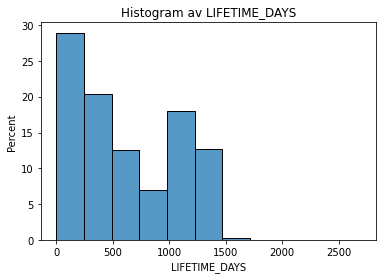

In [30]:
# TIME_DAYS - #7c Hva mener du er fire viktige innsikter i datasettet uavhengig av de konkrete spørsmålene over?
sns.histplot(x='LIFETIME_DAYS', data=df[df['DATA_SOURCE']=='Stock'], bins=11, stat='percent')
plt.title('Histogram av LIFETIME_DAYS')
plt.show()

## Q7-f

In [114]:
# MARKET SEGMENT - #7f Hva mener du er fire viktige innsikter i datasettet uavhengig av de konkrete spørsmålene over?
df7_f = df.value_counts(subset='MARKET_SEGMENT', normalize=True).reset_index(name='PROSENT')
df7_f = df7_f.assign(PROSENT = df7_f['PROSENT']*100)
df7_f

,MARKET_SEGMENT,PROSENT
0,SOHO,62.680848
1,MEDIUM BUS,15.136036
2,SMALL BUS,13.922946
3,ENTERPRISE,7.151551
4,PUBLIC,1.108618


In [121]:
# Plotting the market segments
fig7_f = px.bar(data_frame=df7_f, x='MARKET_SEGMENT', y='PROSENT', color='MARKET_SEGMENT', height=450, width=800, text_auto='.3s')
fig7_f.update_layout(title_text='Markedssegment % i 2018', title_x=0.5, showlegend=False)
fig7_f.show()

## Q7-g

In [127]:
# MARKET SEGMENT - #7g Hva mener du er fire viktige innsikter i datasettet uavhengig av de konkrete spørsmålene over?
df7_g = df.groupby(by=['MARKET_SEGMENT']).agg(KRONER = ('FEE', 'sum')).reset_index()
df7_g = df7_g.sort_values(by='KRONER', ascending=False)
df7_g

,MARKET_SEGMENT,KRONER
4,SOHO,84519944.0
1,MEDIUM BUS,20268575.0
3,SMALL BUS,18944614.0
0,ENTERPRISE,8343283.0
2,PUBLIC,1092204.0


In [128]:
# Plotting the market segments
fig7_g = px.bar(data_frame=df7_g, x='MARKET_SEGMENT', y='KRONER', color='MARKET_SEGMENT', height=450, width=800, text_auto='.3s')
fig7_g.update_layout(title_text='Salg i 2018 - Markedssegment', title_x=0.5, showlegend=False)
fig7_g.show()

## Q7-h

In [141]:
# DAG - #7h Hva mener du er fire viktige innsikter i datasettet uavhengig av de konkrete spørsmålene over?
df7_h = df[df['DATA_SOURCE']=='Cancellation'].groupby(by=['Dag_num', 'Dag']).agg(KANSELLERINGER = ('PRICEPLAN_ID', 'count')).reset_index()
df7_h = df7_h.assign(PROSENT = round(df7_h['KANSELLERINGER']/sum(df7_h['KANSELLERINGER']), 3)*100)
df7_h

,Dag_num,Dag,KANSELLERINGER,PROSENT
0,0,Mon,3414,21.6
1,1,Tue,2595,16.4
2,2,Wed,3409,21.6
3,3,Thu,3390,21.4
4,4,Fri,2884,18.2
5,5,Sat,98,0.6
6,6,Sun,26,0.2


In [142]:
# Plotting the market segments
fig7_h = px.bar(data_frame=df7_h, x='Dag', y='KANSELLERINGER', color='Dag', height=450, width=800, text_auto=True)
fig7_h.update_layout(title_text='Kanselleringer i 2018 - Ukedag', title_x=0.5, showlegend=False)
fig7_h.show()